In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from genff.visualization.plotting import plot_sample, plot_sample_on_full_map
from genff.data_handling.dataset import GroupDataset


# Deviations from fitted circle or ellipse (CircFit Metric)
## Simulated data
The metric should always be close to zero since the data is generated from a circle...

Loading example_beechwood_data.h5
Sample 0


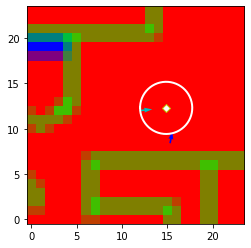

CircFitMetric = 0.26041473231606393 (fit circle)
Sample 1


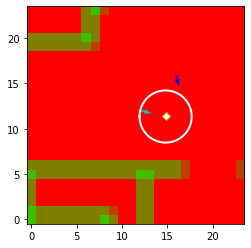

CircFitMetric = 0.4627552821644767 (fit circle)
Sample 2


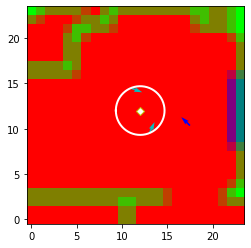

CircFitMetric = 0.7615524530410767 (fit circle)
Sample 3


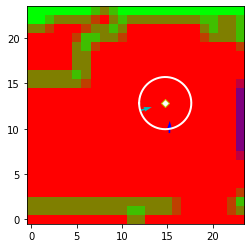

CircFitMetric = 0.11364882194515935 (fit circle)
Sample 4


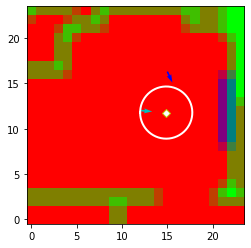

CircFitMetric = 0.41073775255887024 (fit circle)
Sample 5


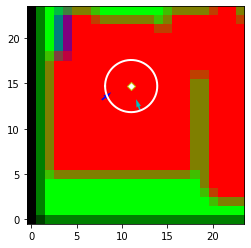

CircFitMetric = 0.1762922732850586 (fit circle)
Sample 6


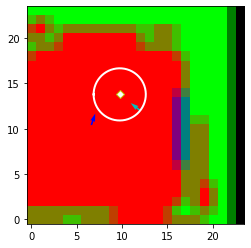

CircFitMetric = 0.43103139463581064 (fit circle)
Sample 7


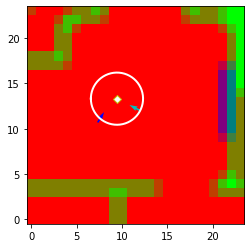

CircFitMetric = 0.12479261305690237 (fit circle)
Sample 8


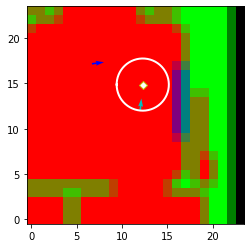

CircFitMetric = 0.7946804102425844 (fit circle)
Sample 9


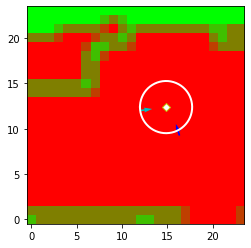

CircFitMetric = 0.14811934894448497 (fit circle)


In [2]:
from genff.metrics import CircFitMetric
metric = CircFitMetric()

dataset = GroupDataset("example_beechwood_data.h5")

def plot_circular_shape(params, env_cropped, env_res):
    
    offset_x = (env_cropped.shape[1] * 0.5) * env_res
    offset_y = (env_cropped.shape[0] * 0.5) * env_res
    theta_fit = np.linspace(-np.pi, np.pi, 180)
    
    if params['type'] == 'circle':
        center = params['center']
        radius = params['radius']
        
        # circle
        x_fit1 = center[0] + radius*np.cos(theta_fit)
        y_fit1 = center[1] + radius*np.sin(theta_fit)
        plt.plot((x_fit1 + offset_x)/env_res, 
                 (y_fit1 + offset_y)/env_res, 
                 'w-' , label="fit", lw=2)

    else: # ellipse
        center = params['center']
        a, b = params['ax_length']
        radians = params['radians'] 
        
        x1 = a*np.cos(theta_fit)
        y1 = b*np.sin(theta_fit)
        
        x2 = x1 * np.cos(radians) - y1 * np.sin(radians) + center[0] 
        y2 = x1 * np.sin(radians) + y1 * np.cos(radians) + center[1]
        
        plt.plot((x2 + offset_x)/env_res, 
                 (y2 + offset_y)/env_res, 
                 'w-' , label="fit", lw=2)
        
    plt.plot((center[0] + offset_x)/env_res, 
             (center[1] + offset_y)/env_res, 
             'wD', mec='y', mew=1)
        
for i in range(10): #range(len(dataset)):
    print("Sample {}".format(i))
    individual, context, mask, env = dataset[i]
    
    m, params = metric.compute_metric(individual, context, mask, env, dataset.resolution)
    
    plot_sample(individual, context, mask, env_cropped=env, env_res=dataset.resolution)
    plot_circular_shape(params, env, dataset.resolution)
    
    plt.show()
    
    print("CircFitMetric = {} (fit {})".format(m, params['type']))

## Cocktail Party data

Loading ../data/cocktail_party/train_skip3.h5
Set has 468 samples
Sample 0
Fitted ['circle']
tensor([[0.0000, 0.0000, 2.4270],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000]])


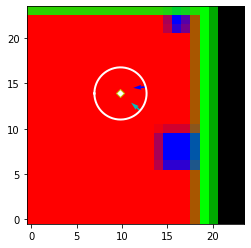

Individual =  [0.14  0.65  3.216]
CircFitMetric = 0.013310054330612942
{'type': 'circle', 'center': (-0.5438593769073486, 0.4718230104446411), 'radius': 0.72}

Sample 1
Fitted ['circle']
tensor([[0.0000, 0.0000, 3.2160],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000]])


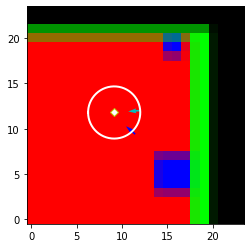

Individual =  [-0.14  -0.65   2.427]
CircFitMetric = 0.11058815052630533
{'type': 'circle', 'center': (-0.7180077838897705, -0.05352392613887787), 'radius': 0.72}

Sample 2
Fitted ['circle']
tensor([[-0.2633, -0.7567, -0.8550],
        [ 0.4767,  0.4233,  4.1740],
        [-0.2133,  0.3333,  5.8030],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])


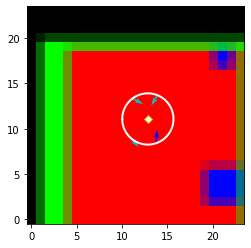

Individual =  [ 0.43666667 -0.8566667   1.479     ]
CircFitMetric = 0.04349162115199967
{'type': 'circle', 'center': (0.21131353318505472, -0.23229265395473034), 'radius': 0.7072890034241225}

Sample 3
Fitted ['circle']
tensor([[ 0.2033, -0.8233,  1.4790],
        [ 0.2433,  0.4567,  4.1740],
        [-0.4467,  0.3667,  5.8030],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])


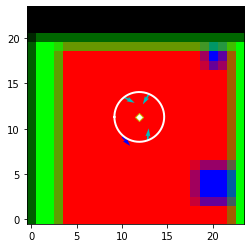

Individual =  [-0.49666667 -0.72333336 -0.855     ]
CircFitMetric = 0.03595357895020146
{'type': 'circle', 'center': (-0.025070476016551973, -0.17557070200223163), 'radius': 0.6868513035578294}

Sample 4
Fitted ['circle']
tensor([[ 0.4500, -0.4300,  1.4790],
        [-0.2500, -0.3300, -0.8550],
        [-0.2000,  0.7600,  5.8030],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])


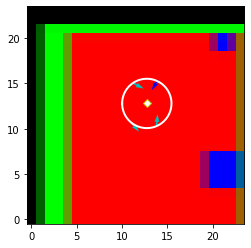

Individual =  [0.49  0.85  4.174]
CircFitMetric = 0.04135616939834652
{'type': 'circle', 'center': (0.1823307197504921, 0.19631509438037634), 'radius': 0.6811148534687567}

Sample 5
Fitted ['circle']
tensor([[ 0.2200, -0.4600,  1.4790],
        [-0.4800, -0.3600, -0.8550],
        [ 0.2600,  0.8200,  4.1740],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])


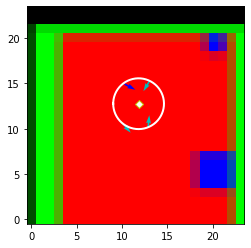

Individual =  [-0.43   0.73   5.803]
CircFitMetric = 0.03628479204198376
{'type': 'circle', 'center': (-0.04444444310370793, 0.1888888790681039), 'radius': 0.7007051099183647}

Sample 6
Fitted ['circle']
tensor([[-0.3700, -0.2150,  0.8710],
        [ 0.3700,  0.2150,  2.7070],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])


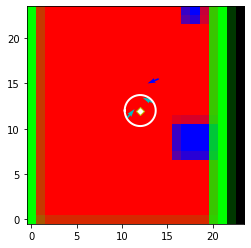

Individual =  [0.51  0.875 3.53 ]
CircFitMetric = 0.5848497152328491
{'type': 'circle', 'center': (0.0, 0.0), 'radius': 0.42793107}

Sample 7
Fitted ['circle']
tensor([[ 0.0700,  0.3300,  3.5300],
        [-0.0700, -0.3300,  2.7070],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])


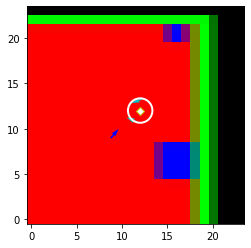

Individual =  [-0.81  -0.76   0.871]
CircFitMetric = 0.7733779549598694
{'type': 'circle', 'center': (0.0, 0.0), 'radius': 0.33734256}

Sample 8
Fitted ['circle']
tensor([[ 0.4400,  0.5450,  3.5300],
        [-0.4400, -0.5450,  0.8710],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])


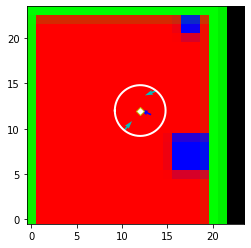

Individual =  [ 0.3   -0.115  2.707]
CircFitMetric = 0.3791598081588745
{'type': 'circle', 'center': (0.0, 0.0), 'radius': 0.7004463}

Sample 9
Fitted ['circle']
tensor([[ 0.3400,  0.1250,  3.8580],
        [-0.3400, -0.1250, -0.1460],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])


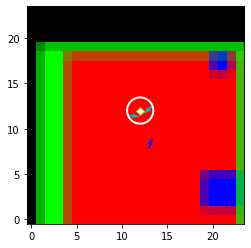

Individual =  [ 0.23  -1.055  1.225]
CircFitMetric = 0.7175300717353821
{'type': 'circle', 'center': (0.0, 0.0), 'radius': 0.3622499}

Sample 10
Fitted ['circle']
tensor([[ 0.2850, -0.4650,  1.2250],
        [-0.2850,  0.4650, -0.1460],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])


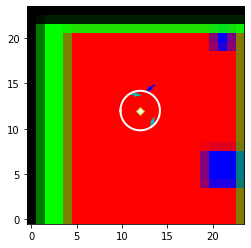

Individual =  [0.395 0.715 3.858]
CircFitMetric = 0.27146393060684204
{'type': 'circle', 'center': (0.0, 0.0), 'radius': 0.5453898}

Sample 11
Fitted ['circle']
tensor([[-0.0550, -0.5900,  1.2250],
        [ 0.0550,  0.5900,  3.8580],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])


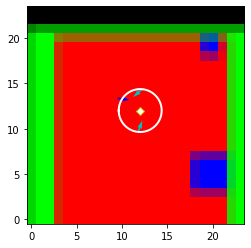

Individual =  [-0.625  0.34  -0.146]
CircFitMetric = 0.11893695592880249
{'type': 'circle', 'center': (0.0, 0.0), 'radius': 0.59255797}

Sample 12
Fitted ['circle']
tensor([[-0.3300, -0.0250,  1.2080],
        [ 0.3300,  0.0250,  2.4520],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])


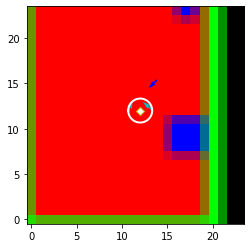

Individual =  [0.46  0.845 3.933]
CircFitMetric = 0.6311484575271606
{'type': 'circle', 'center': (0.0, 0.0), 'radius': 0.33094564}

Sample 13
Fitted ['circle']
tensor([[ 0.0650,  0.4100,  3.9330],
        [-0.0650, -0.4100,  2.4520],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])


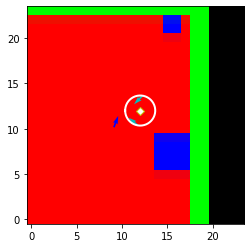

Individual =  [-0.725 -0.46   1.208]
CircFitMetric = 0.4434976279735565
{'type': 'circle', 'center': (0.0, 0.0), 'radius': 0.41512045}

Sample 14
Fitted ['circle']
tensor([[ 0.3950,  0.4350,  3.9330],
        [-0.3950, -0.4350,  1.2080],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])


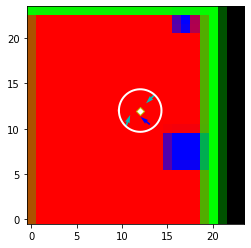

Individual =  [ 0.265 -0.385  2.452]
CircFitMetric = 0.12019345164299011
{'type': 'circle', 'center': (0.0, 0.0), 'radius': 0.5875798}

Sample 15
Fitted ['circle']
tensor([[ 0.3350,  0.1800,  4.4570],
        [-0.3350, -0.1800,  5.6620],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])


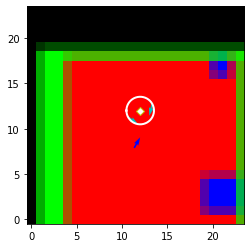

Individual =  [-0.165 -1.03   1.058]
CircFitMetric = 0.6628363132476807
{'type': 'circle', 'center': (0.0, 0.0), 'radius': 0.38029596}

Sample 16
Fitted ['circle']
tensor([[ 0.0850, -0.4250,  1.0580],
        [-0.0850,  0.4250,  5.6620],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])


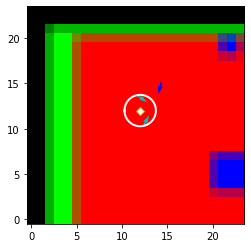

Individual =  [0.585 0.785 4.457]
CircFitMetric = 0.545587956905365
{'type': 'circle', 'center': (0.0, 0.0), 'radius': 0.43341666}

Sample 17
Fitted ['circle']
tensor([[-0.2500, -0.6050,  1.0580],
        [ 0.2500,  0.6050,  4.4570],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])


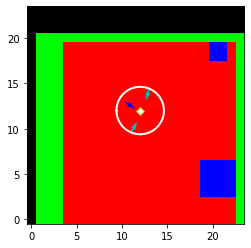

Individual =  [-0.42   0.245  5.662]
CircFitMetric = 0.1683826744556427
{'type': 'circle', 'center': (0.0, 0.0), 'radius': 0.6546182}

Sample 18
Fitted ['circle']
tensor([[-0.3150, -0.0100,  1.0190],
        [ 0.3150,  0.0100,  2.3900],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])


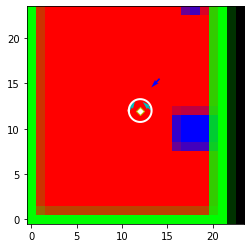

Individual =  [0.535 0.88  3.954]
CircFitMetric = 0.7147078514099121
{'type': 'circle', 'center': (0.0, 0.0), 'radius': 0.3151587}

Sample 19
Fitted ['circle']
tensor([[ 0.1100,  0.4350,  3.9540],
        [-0.1100, -0.4350,  2.3900],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])


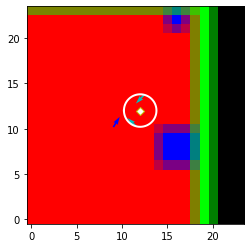

Individual =  [-0.74  -0.455  1.019]
CircFitMetric = 0.41999903321266174
{'type': 'circle', 'center': (0.0, 0.0), 'radius': 0.44869253}

Sample 20
Fitted ['circle']
tensor([[ 0.4250,  0.4450,  3.9540],
        [-0.4250, -0.4450,  1.0190],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])


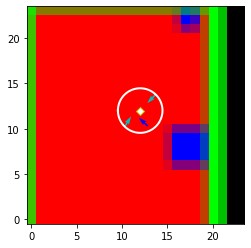

Individual =  [ 0.205 -0.425  2.39 ]
CircFitMetric = 0.14348739385604858
{'type': 'circle', 'center': (0.0, 0.0), 'radius': 0.6153454}

Sample 21
Fitted ['circle']
tensor([[ 0.3150,  0.0800,  3.9940],
        [-0.3150, -0.0800,  5.6700],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])


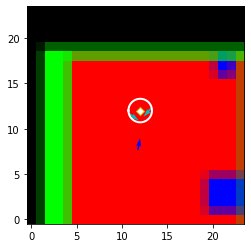

Individual =  [-0.065 -1.09   1.384]
CircFitMetric = 0.7669363617897034
{'type': 'circle', 'center': (0.0, 0.0), 'radius': 0.325}

Sample 22
Fitted ['circle']
tensor([[ 0.1250, -0.5050,  1.3840],
        [-0.1250,  0.5050,  5.6700],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])


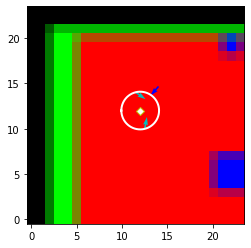

Individual =  [0.505 0.665 3.994]
CircFitMetric = 0.31477469205856323
{'type': 'circle', 'center': (0.0, 0.0), 'radius': 0.5202403}

Sample 23
Fitted ['circle']
tensor([[-0.1900, -0.5850,  1.3840],
        [ 0.1900,  0.5850,  3.9940],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])


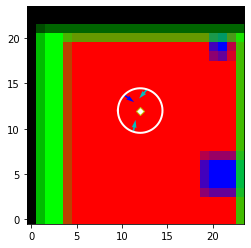

Individual =  [-0.44   0.425  5.67 ]
CircFitMetric = 0.003341972827911377
{'type': 'circle', 'center': (0.0, 0.0), 'radius': 0.6150813}

Sample 24
Fitted ['circle']
tensor([[-0.8675, -0.0150,  0.8130],
        [ 0.0125, -0.8950,  1.4680],
        [ 1.1825, -0.0450,  1.9760],
        [-0.3275,  0.9550,  5.3170],
        [ 0.0000,  0.0000,  0.0000]])


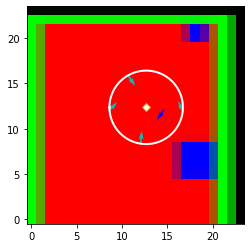

Individual =  [0.6525 0.025  4.127 ]
CircFitMetric = 0.5222710458084425
{'type': 'circle', 'center': (0.16492986495855644, 0.08820400691009367), 'radius': 1.013920674561136}

Sample 25
Fitted ['circle']
tensor([[ 0.2725,  0.0150,  4.1270],
        [-0.3675, -0.9050,  1.4680],
        [ 0.8025, -0.0550,  1.9760],
        [-0.7075,  0.9450,  5.3170],
        [ 0.0000,  0.0000,  0.0000]])


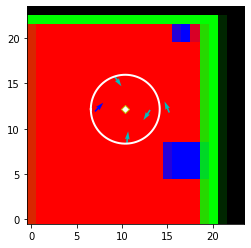

Individual =  [-1.2475 -0.025   0.813 ]
CircFitMetric = 0.11237849528512622
{'type': 'circle', 'center': (-0.4119888442010348, 0.036934178701690676), 'radius': 0.9501819557610661}

Sample 26
Fitted ['circle']
tensor([[ 0.4925, -0.2050,  4.1270],
        [-1.0275, -0.2450,  0.8130],
        [ 1.0225, -0.2750,  1.9760],
        [-0.4875,  0.7250,  5.3170],
        [ 0.0000,  0.0000,  0.0000]])


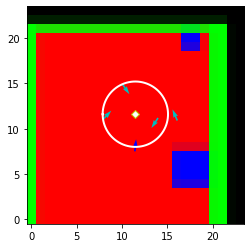

Individual =  [-0.1475 -1.125   1.468 ]
CircFitMetric = 0.12222573232097611
{'type': 'circle', 'center': (-0.13410057817761029, -0.10084357040597136), 'radius': 0.902018348261507}

Sample 27
Fitted ['circle']
tensor([[ 0.7850,  0.0075,  4.1270],
        [-0.7350, -0.0325,  0.8130],
        [ 0.1450, -0.9125,  1.4680],
        [-0.1950,  0.9375,  5.3170],
        [ 0.0000,  0.0000,  0.0000]])


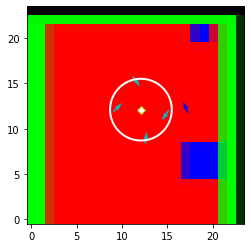

Individual =  [ 1.315  -0.0625  1.976 ]
CircFitMetric = 0.44633726517971983
{'type': 'circle', 'center': (0.02018071391814624, 0.024647195541308384), 'radius': 0.8514114645366869}

Sample 28
Fitted ['circle']
tensor([[ 0.4075,  0.2575,  4.1270],
        [-1.1125,  0.2175,  0.8130],
        [-0.2325, -0.6625,  1.4680],
        [ 0.9375,  0.1875,  1.9760],
        [ 0.0000,  0.0000,  0.0000]])


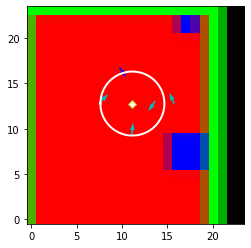

Individual =  [-0.5725  1.1875  5.317 ]
CircFitMetric = 0.1737963001598407
{'type': 'circle', 'center': (-0.21518568487566367, 0.1929445886317485), 'radius': 0.882997898943947}

Sample 29
Fitted ['circle']
tensor([[0.0000, 0.0000, 5.4640],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000]])


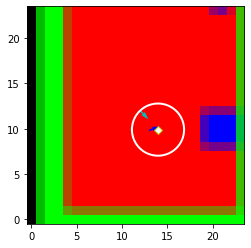

Individual =  [ 0.24  -0.55   6.619]
CircFitMetric = 0.46723226813836627
{'type': 'circle', 'center': (0.491628098487854, -0.5260245323181152), 'radius': 0.72}

Sample 30
Fitted ['circle']
tensor([[0.0000, 0.0000, 6.6190],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000]])


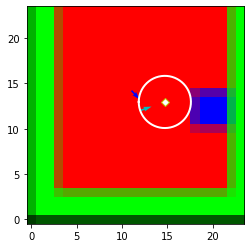

Individual =  [-0.24   0.55   5.464]
CircFitMetric = 0.2514942565834396
{'type': 'circle', 'center': (0.6797823572158813, 0.23726767301559448), 'radius': 0.72}

Sample 31
Fitted ['circle']
tensor([[-0.4667, -0.1900, -0.4050],
        [-0.2167,  0.6800, -1.5240],
        [ 0.6833, -0.4900,  1.6420],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])


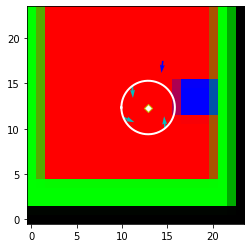

Individual =  [0.62333333 1.37       4.598     ]
CircFitMetric = 0.6098950079883108
{'type': 'circle', 'center': (0.21891911397146868, 0.08391213708088609), 'radius': 0.7382788923378332}

Sample 32
Fitted ['circle']
tensor([[ 0.2600,  0.8500,  4.5980],
        [-0.5800,  0.1600, -1.5240],
        [ 0.3200, -1.0100,  1.6420],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])


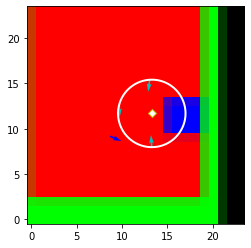

Individual =  [-0.83  -0.71  -0.405]
CircFitMetric = 0.38053923527707034
{'type': 'circle', 'center': (0.3197475059078746, -0.07904038604599628), 'radius': 0.9309596386559392}

Sample 33
Fitted ['circle']
tensor([[ 0.3433,  1.1400,  4.5980],
        [-0.7467, -0.4200, -0.4050],
        [ 0.4033, -0.7200,  1.6420],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])


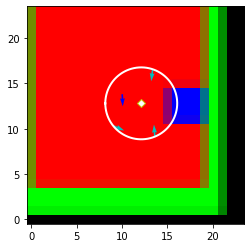

Individual =  [-0.49666667  0.45       -1.524     ]
CircFitMetric = 0.4097576097022396
{'type': 'circle', 'center': (0.028913271638015457, 0.19888965356420232), 'radius': 0.9922442404415812}

Sample 34
Fitted ['circle']
tensor([[ 0.6433,  0.7500,  4.5980],
        [-0.4467, -0.8100, -0.4050],
        [-0.1967,  0.0600, -1.5240],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])


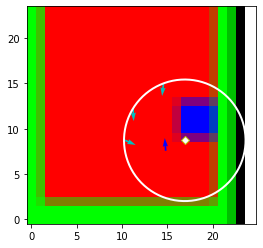

Individual =  [ 0.7033333 -1.11       1.642    ]
CircFitMetric = 1.076002163650445
{'type': 'circle', 'center': (1.230402090143839, -0.8209967435717603), 'radius': 1.677104801157269}

Sample 35
Fitted ['ellipse']
tensor([[-0.6860,  0.3400,  6.0080],
        [ 0.7740, -0.0800,  2.9260],
        [-0.3960, -0.2000,  0.6500],
        [-0.2160,  0.8100,  5.3730],
        [ 0.5240, -0.8700,  1.6190]])


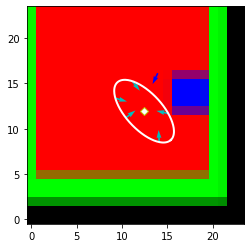

Individual =  [0.484 1.03  4.27 ]
CircFitMetric = 0.5328118642740601
{'type': 'ellipse', 'center': (0.10724458780449948, -0.017205169389963276), 'ax_length': (1.0844972382574085, 0.502625148205222), 'radians': 2.3186060900579823}

Sample 36
Fitted ['ellipse']
tensor([[ 0.2500,  0.8920,  4.2700],
        [ 0.5400, -0.2180,  2.9260],
        [-0.6300, -0.3380,  0.6500],
        [-0.4500,  0.6720,  5.3730],
        [ 0.2900, -1.0080,  1.6190]])


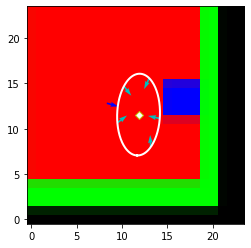

Individual =  [-0.92   0.202  6.008]
CircFitMetric = 0.31104383586806145
{'type': 'ellipse', 'center': (-0.045395207434652425, -0.1116646667283752), 'ax_length': (1.1283296191082037, 0.590503267793525), 'radians': 1.5352101435767835}

Sample 37
Fitted ['circle']
tensor([[ 0.5420,  0.8080,  4.2700],
        [-0.6280,  0.1180,  6.0080],
        [-0.3380, -0.4220,  0.6500],
        [-0.1580,  0.5880,  5.3730],
        [ 0.5820, -1.0920,  1.6190]])


../genff/opt_method/opt_generator.py:110: UserWarning: Failed to fit ellipse. Fitting circle instead. Error: The fitted ellipse has a major semi-axis of 12.329015747110345 units (>5), but this is not likely for group conversations. The fitting must have given a bad result!
  warnings.warn('Failed to fit ellipse. Fitting circle instead. Error: {}'.format(e))


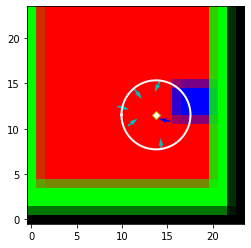

Individual =  [ 0.832 -0.302  2.926]
CircFitMetric = 0.5151398810437777
{'type': 'circle', 'center': (0.43554657204462854, -0.1184044605090255), 'radius': 0.9520410726101037}

Sample 38
Fitted ['ellipse']
tensor([[ 0.3080,  0.7840,  4.2700],
        [-0.8620,  0.0940,  6.0080],
        [ 0.5980, -0.3260,  2.9260],
        [-0.3920,  0.5640,  5.3730],
        [ 0.3480, -1.1160,  1.6190]])


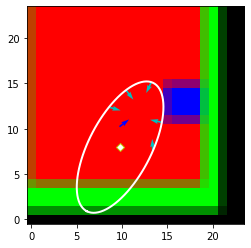

Individual =  [-0.572 -0.446  0.65 ]
CircFitMetric = 0.5555152949304576
{'type': 'ellipse', 'center': (-0.554392437222305, -1.0089233435485638), 'ax_length': (1.9937674452900094, 0.8612676801227657), 'radians': 1.0912433780408142}

Sample 39
Fitted ['ellipse']
tensor([[ 0.3440,  0.9860,  4.2700],
        [-0.8260,  0.2960,  6.0080],
        [ 0.6340, -0.1240,  2.9260],
        [-0.5360, -0.2440,  0.6500],
        [ 0.3840, -0.9140,  1.6190]])


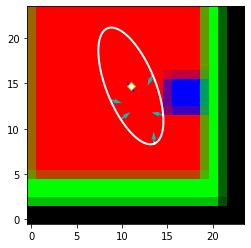

Individual =  [-0.356  0.766  5.373]
CircFitMetric = 0.6127869986282755
{'type': 'ellipse', 'center': (-0.2574322758077258, 0.6789396734357921), 'ax_length': (1.7172820852465838, 0.6731688015821745), 'radians': 1.9567978319222412}

Sample 40
Fitted ['ellipse']
tensor([[ 0.4920,  0.6500,  4.2700],
        [-0.6780, -0.0400,  6.0080],
        [ 0.7820, -0.4600,  2.9260],
        [-0.3880, -0.5800,  0.6500],
        [-0.2080,  0.4300,  5.3730]])


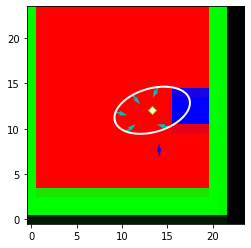

Individual =  [ 0.532 -1.25   1.619]
CircFitMetric = 0.6681940522995008
{'type': 'ellipse', 'center': (0.3316623813545266, 0.00813979248231169), 'ax_length': (1.07102555936946, 0.6004200342160482), 'radians': 0.2870561808729819}

Sample 41
Fitted ['ellipse']
tensor([[-0.5040,  0.3140,  5.9160],
        [ 0.9260,  0.0140,  2.9320],
        [-0.5440, -0.3060,  0.4880],
        [-0.0440,  0.5740,  4.7280],
        [ 0.1660, -0.5960,  1.6960]])


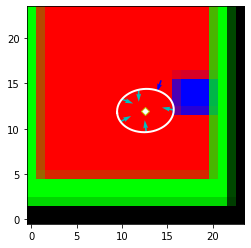

Individual =  [0.576 0.834 4.371]
CircFitMetric = 0.2993806011817192
{'type': 'ellipse', 'center': (0.14396270354162657, 0.00029941650349108335), 'ax_length': (0.7831466239013452, 0.5965086051523218), 'radians': 0.07669526018917712}

Sample 42
Fitted ['ellipse']
tensor([[ 0.3600,  0.7300,  4.3710],
        [ 0.7100, -0.0900,  2.9320],
        [-0.7600, -0.4100,  0.4880],
        [-0.2600,  0.4700,  4.7280],
        [-0.0500, -0.7000,  1.6960]])


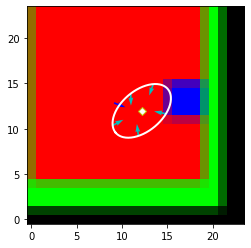

Individual =  [-0.72   0.21   5.916]
CircFitMetric = 0.15409294190134096
{'type': 'ellipse', 'center': (0.042279133261293525, -0.00878308276803418), 'ax_length': (0.9385604423789969, 0.5630009000628335), 'radians': 0.6966457526634416}

Sample 43
Fitted ['circle']
tensor([[ 0.6460,  0.6700,  4.3710],
        [-0.4340,  0.1500,  5.9160],
        [-0.4740, -0.4700,  0.4880],
        [ 0.0260,  0.4100,  4.7280],
        [ 0.2360, -0.7600,  1.6960]])


../genff/opt_method/opt_generator.py:110: UserWarning: Failed to fit ellipse. Fitting circle instead. Error: The fitted ellipse has a major semi-axis of 8.593913811400531 units (>5), but this is not likely for group conversations. The fitting must have given a bad result!
  warnings.warn('Failed to fit ellipse. Fitting circle instead. Error: {}'.format(e))


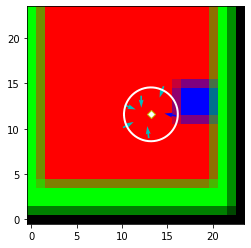

Individual =  [ 0.996 -0.15   2.932]
CircFitMetric = 0.04076135512872925
{'type': 'circle', 'center': (0.2955879091995964, -0.10395389906179513), 'radius': 0.7426853749090123}

Sample 44
Fitted ['ellipse']
tensor([[ 0.3520,  0.6060,  4.3710],
        [-0.7280,  0.0860,  5.9160],
        [ 0.7020, -0.2140,  2.9320],
        [-0.2680,  0.3460,  4.7280],
        [-0.0580, -0.8240,  1.6960]])


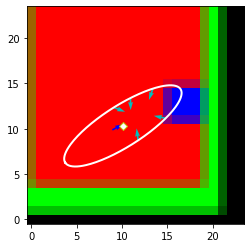

Individual =  [-0.768 -0.534  0.488]
CircFitMetric = 0.49359428953828
{'type': 'ellipse', 'center': (-0.477517472456916, -0.4235941466627174), 'ax_length': (1.887446716343455, 0.564666110659519), 'radians': 0.5675047380633834}

Sample 45
Fitted ['ellipse']
tensor([[ 0.4520,  0.7820,  4.3710],
        [-0.6280,  0.2620,  5.9160],
        [ 0.8020, -0.0380,  2.9320],
        [-0.6680, -0.3580,  0.4880],
        [ 0.0420, -0.6480,  1.6960]])


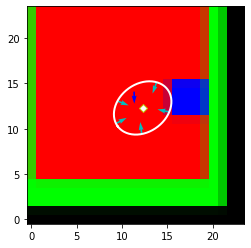

Individual =  [-0.168  0.522  4.728]
CircFitMetric = 0.15756345506726177
{'type': 'ellipse', 'center': (0.06795499861515662, 0.0719285739868023), 'ax_length': (0.8552686880980493, 0.6631567720878299), 'radians': 0.6309107016397396}

Sample 46
Fitted ['ellipse']
tensor([[ 0.4940,  0.5480,  4.3710],
        [-0.5860,  0.0280,  5.9160],
        [ 0.8440, -0.2720,  2.9320],
        [-0.6260, -0.5920,  0.4880],
        [-0.1260,  0.2880,  4.7280]])


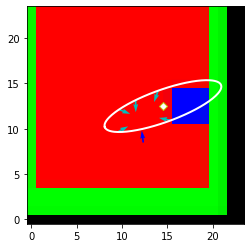

Individual =  [ 0.084 -0.882  1.696]
CircFitMetric = 0.3706903610056431
{'type': 'ellipse', 'center': (0.6271343144403811, 0.12268626661447068), 'ax_length': (1.7059497059514177, 0.44527235046534885), 'radians': 0.3468037474355667}

Sample 47
Fitted ['circle']
tensor([[-0.4125,  0.4175,  5.9120],
        [ 0.7075, -0.7025,  2.0850],
        [-0.5225, -0.3325,  0.2010],
        [ 0.2275,  0.6175,  4.4840],
        [ 0.0000,  0.0000,  0.0000]])


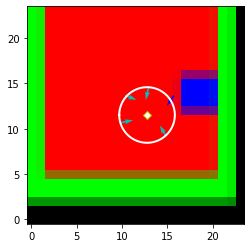

Individual =  [0.9275 0.4075 4.109 ]
CircFitMetric = 0.14184043798930668
{'type': 'circle', 'center': (0.18881538808706613, -0.12233931680182164), 'radius': 0.7672165846072071}

Sample 48
Fitted ['circle']
tensor([[ 0.5925,  0.4100,  4.1090],
        [ 0.3725, -0.7000,  2.0850],
        [-0.8575, -0.3300,  0.2010],
        [-0.1075,  0.6200,  4.4840],
        [ 0.0000,  0.0000,  0.0000]])


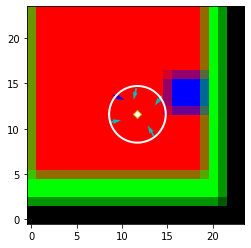

Individual =  [-0.7475  0.42    5.912 ]
CircFitMetric = 0.0694079955446737
{'type': 'circle', 'center': (-0.07649208480572897, -0.10385487899871365), 'radius': 0.7818707754610957}

Sample 49
Fitted ['circle']
tensor([[ 0.8725,  0.1300,  4.1090],
        [-0.4675,  0.1400,  5.9120],
        [-0.5775, -0.6100,  0.2010],
        [ 0.1725,  0.3400,  4.4840],
        [ 0.0000,  0.0000,  0.0000]])


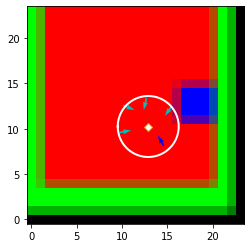

Individual =  [ 0.6525 -0.98    2.085 ]
CircFitMetric = 0.15058371424571526
{'type': 'circle', 'center': (0.22162210875385796, -0.44023643514656335), 'radius': 0.8412359140524737}



In [3]:
dataset = GroupDataset("../data/cocktail_party/train_skip3.h5")
print("Set has {} samples".format(len(dataset)))

for i in range(50):
    print("Sample {}".format(i))
    individual, context, mask, env = dataset[i]
    
    m, params = metric.compute_metric(individual, context, mask, env, dataset.resolution)
    print("Fitted {}".format([params['type']]))
    
    print(context)
    
    plot_sample(individual, context, mask, env_cropped=env, env_res=dataset.resolution)
    plot_circular_shape(params, env, dataset.resolution)
    plt.show()
    
    print("Individual = ", individual.numpy().flatten())
    print("CircFitMetric = {}".format(m))
    print(params)
    print()

# Individual is not on free space (NotFree Metric)
## Simulated data

Loading example_beechwood_data.h5
Sample 0
NotFreeMetric = 0.0


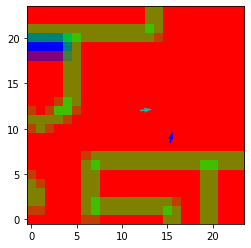

Flipped - NotFreeMetric = 1.0


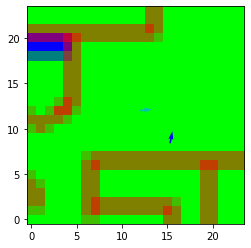

Sample 1
NotFreeMetric = 0.0


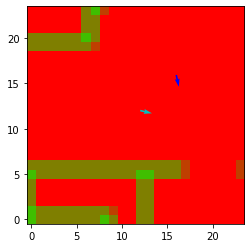

Flipped - NotFreeMetric = 1.0


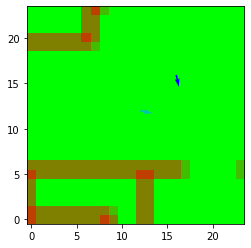

Sample 2
NotFreeMetric = 0.0


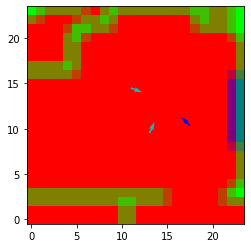

Flipped - NotFreeMetric = 1.0


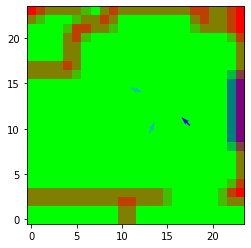

Sample 3
NotFreeMetric = 0.0


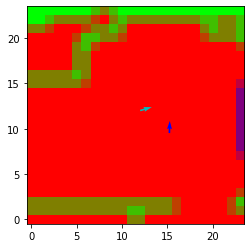

Flipped - NotFreeMetric = 1.0


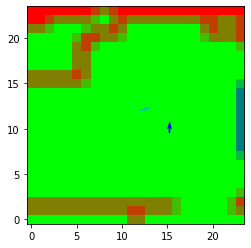

Sample 4
NotFreeMetric = 0.0


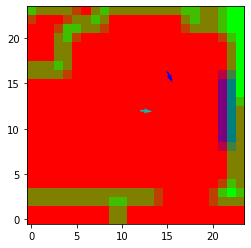

Flipped - NotFreeMetric = 1.0


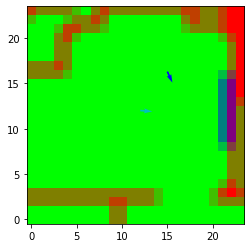

Sample 5
NotFreeMetric = 0.0


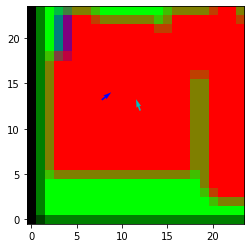

Flipped - NotFreeMetric = 1.0


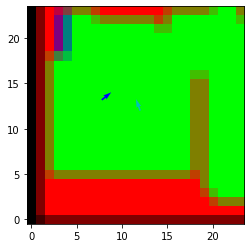

Sample 6
NotFreeMetric = 0.0


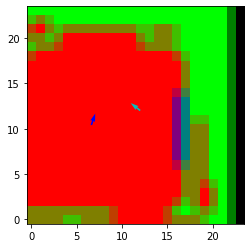

Flipped - NotFreeMetric = 1.0


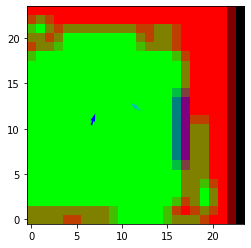

Sample 7
NotFreeMetric = 0.0


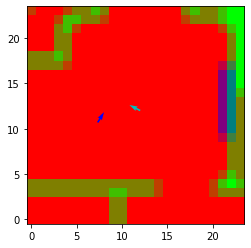

Flipped - NotFreeMetric = 1.0


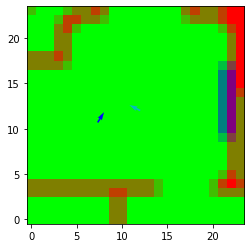

Sample 8
NotFreeMetric = 0.0


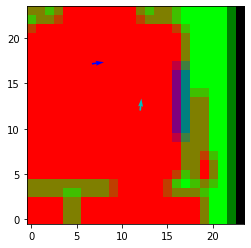

Flipped - NotFreeMetric = 1.0


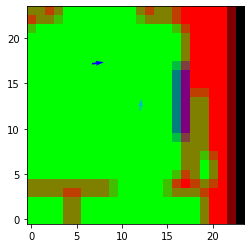

Sample 9
NotFreeMetric = 0.0


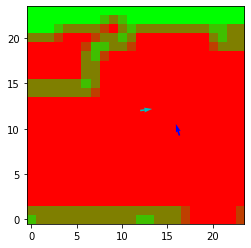

Flipped - NotFreeMetric = 1.0


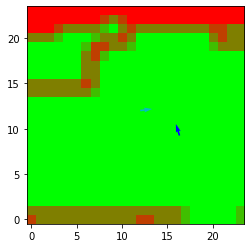

In [4]:
from genff.metrics import NotFreeMetric
import torch
metric = NotFreeMetric()

dataset = GroupDataset("example_beechwood_data.h5")

for i in range(10): #len(dataset)):
    print("Sample {}".format(i))
    individual, context, mask, env = dataset[i]
    
    m = metric(individual, context, mask, env, dataset.resolution)
    print("NotFreeMetric = {}".format(m))
    plot_sample(individual, context, mask, env_cropped=env, env_res=dataset.resolution)
    plt.show()
    
    # and what if we flip the map?
    new_env = torch.clone(env)
    new_env[:,:,1] = env[:,:,2]
    new_env[:,:,2] = env[:,:,1]
    m = metric(individual, context, mask, new_env, dataset.resolution)
    print("Flipped - NotFreeMetric = {}".format(m))
    plot_sample(individual, context, mask, env_cropped=new_env, env_res=dataset.resolution)
    plt.show()

# Violations to proxemics zones (PersonalSpace and IntimateSpace Metrics)
## Cocktail Party data

Loading ../data/cocktail_party/train_skip3.h5
Set has 468 samples
Sample 0


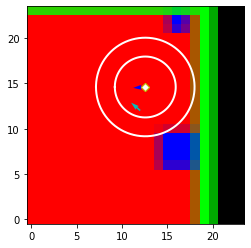

PersonalSpace = 1
IntimateSpace = 1

Sample 1


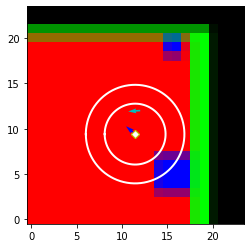

PersonalSpace = 1
IntimateSpace = 1

Sample 2


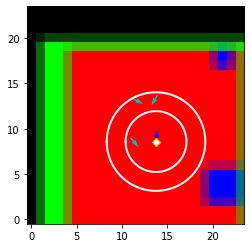

PersonalSpace = 3
IntimateSpace = 1

Sample 3


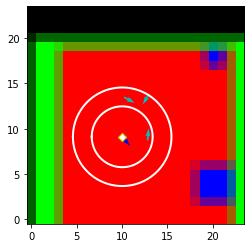

PersonalSpace = 2
IntimateSpace = 1

Sample 4


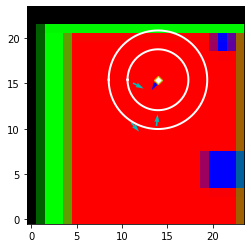

PersonalSpace = 2
IntimateSpace = 1

Sample 5


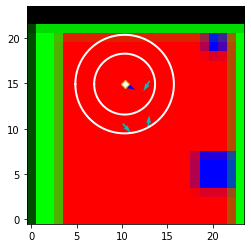

PersonalSpace = 3
IntimateSpace = 1

Sample 6


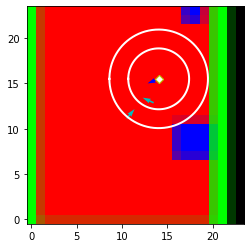

PersonalSpace = 1
IntimateSpace = 1

Sample 7


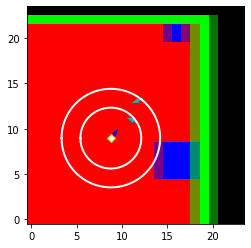

PersonalSpace = 1
IntimateSpace = 0

Sample 8


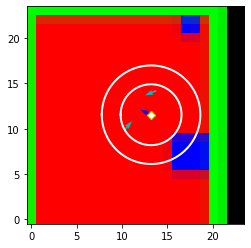

PersonalSpace = 2
IntimateSpace = 1

Sample 9


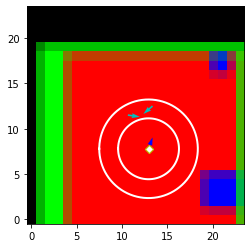

PersonalSpace = 2
IntimateSpace = 0

Sample 10


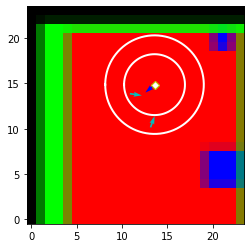

PersonalSpace = 2
IntimateSpace = 1

Sample 11


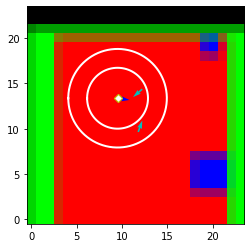

PersonalSpace = 2
IntimateSpace = 1

Sample 12


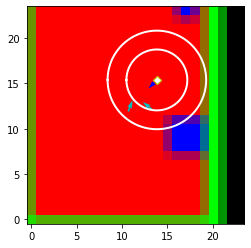

PersonalSpace = 2
IntimateSpace = 1

Sample 13


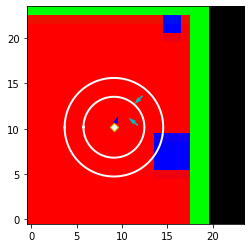

PersonalSpace = 2
IntimateSpace = 1

Sample 14


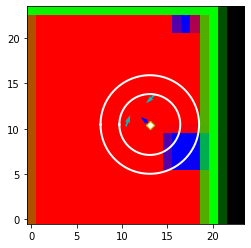

PersonalSpace = 2
IntimateSpace = 2

Sample 15


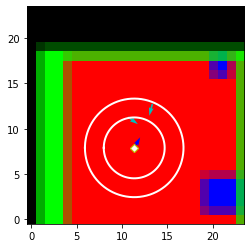

PersonalSpace = 2
IntimateSpace = 0

Sample 16


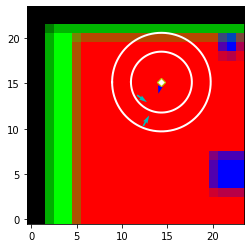

PersonalSpace = 2
IntimateSpace = 1

Sample 17


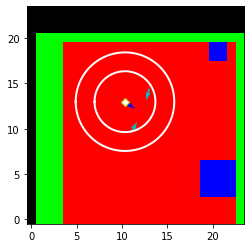

PersonalSpace = 2
IntimateSpace = 1

Sample 18


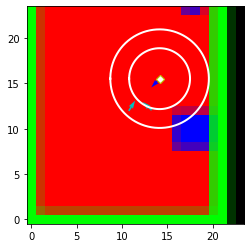

PersonalSpace = 2
IntimateSpace = 0

Sample 19


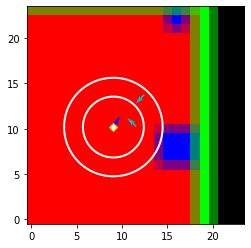

PersonalSpace = 2
IntimateSpace = 1



In [5]:
from genff.metrics import PersonalSpaceMetric, IntimateSpaceMetric

ps_t = 0.68*2 # we increase the threshold to check if things are working as expected...
is_t = 0.42*2

metric_ps = PersonalSpaceMetric(ps_t)
metric_is = IntimateSpaceMetric(is_t)

dataset = GroupDataset("../data/cocktail_party/train_skip3.h5")
print("Set has {} samples".format(len(dataset)))

for i in range(20):
    print("Sample {}".format(i))
    individual, context, mask, env = dataset[i]
    
    m_ps = metric_ps(individual, context, mask)
    m_is = metric_is(individual, context, mask)

    plot_sample(individual, context, mask, env_cropped=env, env_res=dataset.resolution)
    
    plot_circular_shape({'type': 'circle',
                         'center': individual.numpy().flatten(),
                         'radius': ps_t}, env, dataset.resolution)
    plot_circular_shape({'type': 'circle',
                         'center': individual.numpy().flatten(),
                         'radius': is_t}, env, dataset.resolution)
    
    plt.show()
    
    print("PersonalSpace = {}".format(m_ps))
    print("IntimateSpace = {}".format(m_is))
    print()

# Dist between o-space proposals and group’s avg (CenterDist Metric)
## Simulated data

Loading example_beechwood_data.h5
Sample 0
CenterDistMetric = 0.1812765896320343
Avg Proposal = [ 0.838645  -0.0601663]


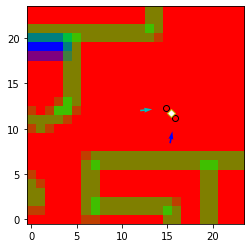

Sample 1
CenterDistMetric = 0.3150552660226822
Avg Proposal = [0.92526984 0.05719665]


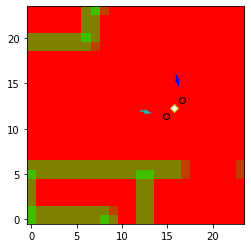

Sample 2
CenterDistMetric = 0.22698606550693512
Avg Proposal = [0.6107326  0.16441642]


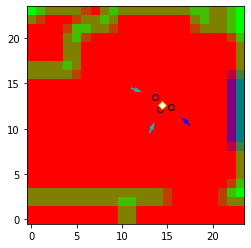

Sample 3
CenterDistMetric = 0.08683851361274719
Avg Proposal = [0.7588966  0.15238193]


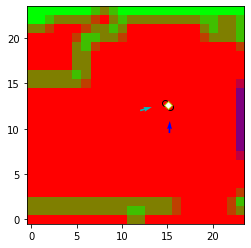

Sample 4
CenterDistMetric = 0.29019795358181
Avg Proposal = [0.883798   0.18212599]


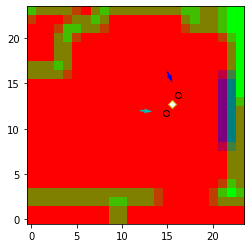

Sample 5
CenterDistMetric = 0.12949810922145844
Avg Proposal = [-0.37375063  0.71021867]


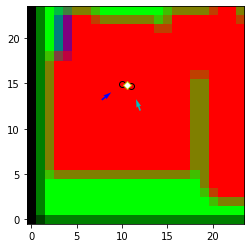

Sample 6
CenterDistMetric = 0.28696396946907043
Avg Proposal = [-0.8405298  0.3644145]


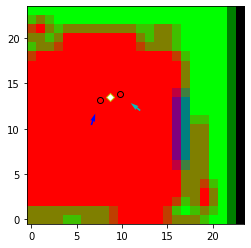

Sample 7
CenterDistMetric = 0.08015606924891472
Avg Proposal = [-0.7182369   0.30618292]


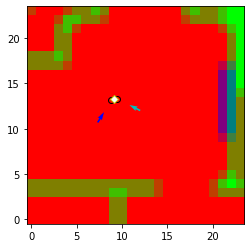

Sample 8
CenterDistMetric = 0.4788743406534195
Avg Proposal = [-0.2735033  1.0498588]


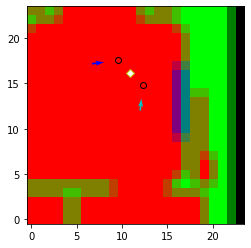

Sample 9
CenterDistMetric = 0.09153421968221664
Avg Proposal = [0.79086834 0.04652284]


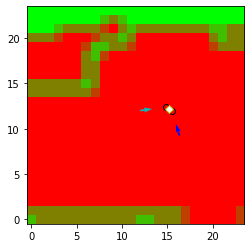

In [6]:
from genff.metrics import CenterDistMetric
metric = CenterDistMetric()

dataset = GroupDataset("example_beechwood_data.h5")

for i in range(10): #(len(dataset)):
    print("Sample {}".format(i))
    individual, context, mask, env = dataset[i]
    
    m, (avg_proposal, all_proposals) = metric.compute_metric(individual, context, mask)
    print("CenterDistMetric = {}".format(m))
    print("Avg Proposal = {}".format(avg_proposal.flatten()))
    plot_sample(individual, context, mask, env_cropped=env, env_res=dataset.resolution)
    
    offset_x = (env.shape[1] * 0.5) * dataset.resolution
    offset_y = (env.shape[0] * 0.5) * dataset.resolution
    
    plt.plot((all_proposals[:,0] + offset_x)/dataset.resolution, 
             (all_proposals[:,1] + offset_y)/dataset.resolution, 
             'ro', mec='k', mew=1)
    plt.plot((avg_proposal[0,0] + offset_x)/dataset.resolution, 
             (avg_proposal[0,1] + offset_y)/dataset.resolution, 
             'wD', mec='y', mew=1)
    
    plt.show()

## Cocktail Party Data

Loading ../data/cocktail_party/train_skip3.h5
Set has 468 samples
Sample 0
CenterDistMetric = 0.06462293118238449
Avg Proposal = [-0.5609336  0.5341495]


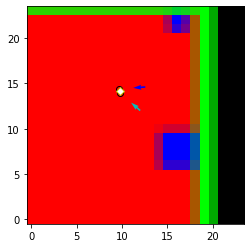

Sample 1
CenterDistMetric = 0.0646229162812233
Avg Proposal = [-0.7009336  -0.11585043]


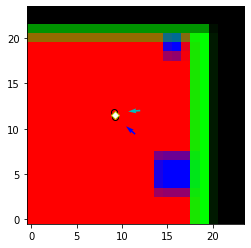

Sample 2
CenterDistMetric = 0.4868161976337433
Avg Proposal = [ 0.31113413 -0.40843353]


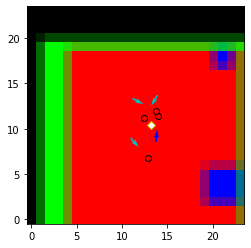

Sample 3
CenterDistMetric = 0.4868162274360657
Avg Proposal = [ 0.07780082 -0.37510023]


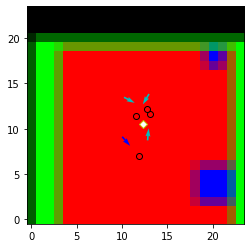

Sample 4
CenterDistMetric = 0.48681623488664627
Avg Proposal = [0.32446748 0.0182331 ]


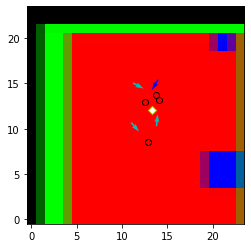

Sample 5
CenterDistMetric = 0.4868162125349045
Avg Proposal = [ 0.09446748 -0.0117669 ]


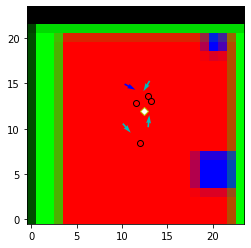

Sample 6
CenterDistMetric = 0.18398007502158484
Avg Proposal = [-0.11523837  0.48541856]


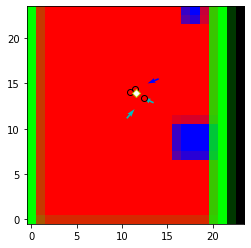

Sample 7
CenterDistMetric = 0.1839800700545311
Avg Proposal = [-0.55523837 -0.05958144]


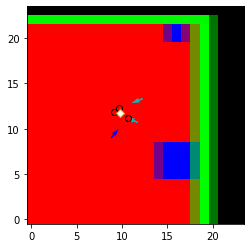

Sample 8
CenterDistMetric = 0.1839800700545311
Avg Proposal = [-0.18523836  0.15541856]


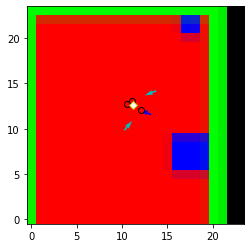

Sample 9
CenterDistMetric = 0.2886045575141907
Avg Proposal = [ 0.21445955 -0.31839195]


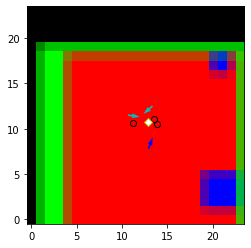

Sample 10
CenterDistMetric = 0.2886045475800832
Avg Proposal = [0.26945958 0.27160802]


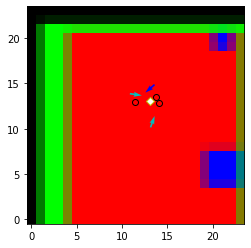

Sample 11
CenterDistMetric = 0.2886045475800832
Avg Proposal = [-0.07054044  0.14660804]


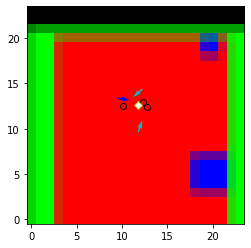

Sample 12
CenterDistMetric = 0.14848497758309046
Avg Proposal = [-0.1153371  0.4880158]


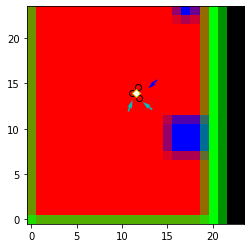

Sample 13
CenterDistMetric = 0.14848498006661734
Avg Proposal = [-0.5103371   0.05301579]


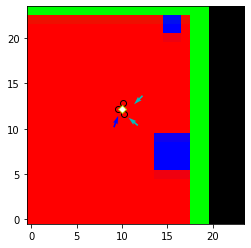

Sample 14
CenterDistMetric = 0.14848498503367105
Avg Proposal = [-0.18033712  0.0780158 ]


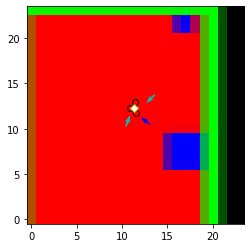

Sample 15
CenterDistMetric = 0.0854644626379013
Avg Proposal = [ 0.19728394 -0.50609857]


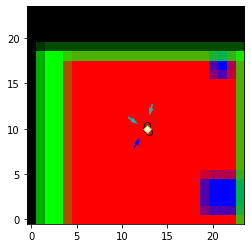

Sample 16
CenterDistMetric = 0.0854644663631916
Avg Proposal = [0.44728398 0.09890146]


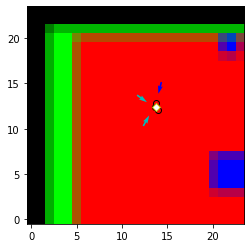

Sample 17
CenterDistMetric = 0.08546444897850354
Avg Proposal = [ 0.11228397 -0.08109855]


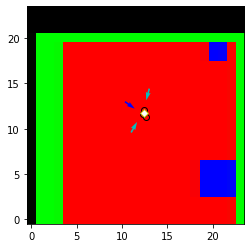

Sample 18
CenterDistMetric = 0.15938431521256766
Avg Proposal = [-0.03625967  0.48735952]


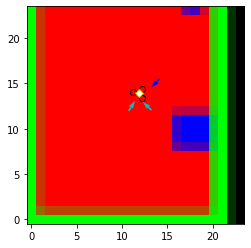

Sample 19
CenterDistMetric = 0.15938430527846018
Avg Proposal = [-0.4612597   0.04235952]


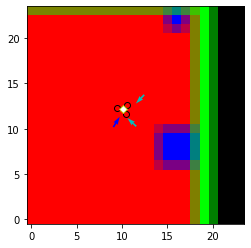

In [7]:
dataset = GroupDataset("../data/cocktail_party/train_skip3.h5")
print("Set has {} samples".format(len(dataset)))

for i in range(20):
    print("Sample {}".format(i))
    individual, context, mask, env = dataset[i]
    
    m, (avg_proposal, all_proposals) = metric.compute_metric(individual, context, mask)
    print("CenterDistMetric = {}".format(m))
    print("Avg Proposal = {}".format(avg_proposal.flatten()))
    plot_sample(individual, context, mask, env_cropped=env, env_res=dataset.resolution)
    
    offset_x = (env.shape[1] * 0.5) * dataset.resolution
    offset_y = (env.shape[0] * 0.5) * dataset.resolution
    
    plt.plot((all_proposals[:,0] + offset_x)/dataset.resolution, 
             (all_proposals[:,1] + offset_y)/dataset.resolution, 
             'ro', mec='k', mew=1)
    plt.plot((avg_proposal[0,0] + offset_x)/dataset.resolution, 
             (avg_proposal[0,1] + offset_y)/dataset.resolution, 
             'wD', mec='y', mew=1)
    
    plt.show()

# ChangeCenterDist Metric

In this case, we tried various ways to evaluate differences in CenterDist once the individual is added to the group, but no option seemed effective.. Below we exemplify the case where we compute the o-space center without the individual, and then evaluate CenterDist with that o-space just for the context minus CenterDist with that o-space for the full group.

## Simulated data

Loading example_beechwood_data.h5
Sample 0
ChangeCenterDistMetric = -0.1812765896320343
Avg Proposal1 = [0.71623474 0.07353837]
Avg Proposal2 = [ 0.838645  -0.0601663]


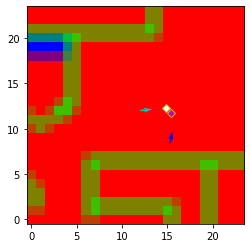

Sample 1
ChangeCenterDistMetric = -0.3150552809238434
Avg Proposal1 = [ 0.7010445 -0.164124 ]
Avg Proposal2 = [0.92526984 0.05719665]


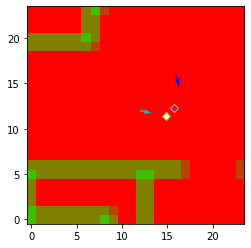

Sample 2
ChangeCenterDistMetric = -0.06858399510383606
Avg Proposal1 = [0.48714387 0.20169139]
Avg Proposal2 = [0.6107326  0.16441642]


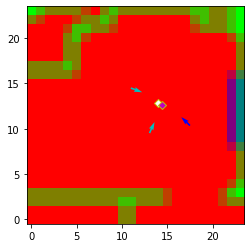

Sample 3
ChangeCenterDistMetric = -0.08683851361274719
Avg Proposal1 = [0.6900918  0.20536141]
Avg Proposal2 = [0.7588966  0.15238193]


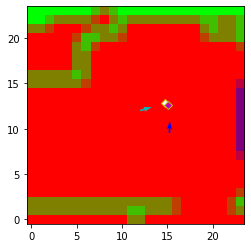

Sample 4
ChangeCenterDistMetric = -0.2901979684829712
Avg Proposal1 = [ 0.7178249  -0.05592398]
Avg Proposal2 = [0.883798   0.18212599]


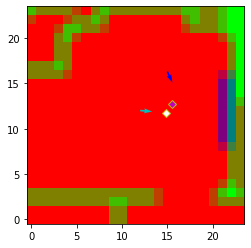

Sample 5
ChangeCenterDistMetric = -0.12949810922145844
Avg Proposal1 = [-0.24896999  0.6755842 ]
Avg Proposal2 = [-0.37375063  0.71021867]


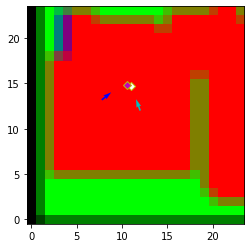

Sample 6
ChangeCenterDistMetric = -0.28696396946907043
Avg Proposal1 = [-0.56535906  0.44583538]
Avg Proposal2 = [-0.8405298  0.3644145]


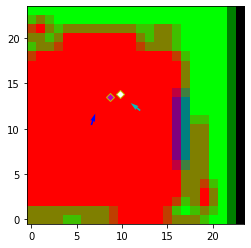

Sample 7
ChangeCenterDistMetric = -0.08015606552362442
Avg Proposal1 = [-0.6410511   0.32780102]
Avg Proposal2 = [-0.7182369   0.30618292]


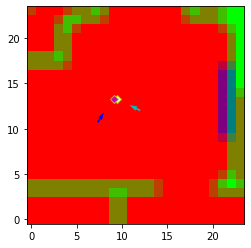

Sample 8
ChangeCenterDistMetric = -0.4788743257522583
Avg Proposal1 = [0.07034205 0.7165557 ]
Avg Proposal2 = [-0.2735033  1.0498588]


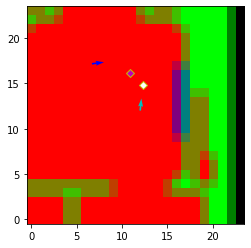

Sample 9
ChangeCenterDistMetric = -0.09153421968221664
Avg Proposal1 = [0.7136212  0.09562876]
Avg Proposal2 = [0.79086834 0.04652284]


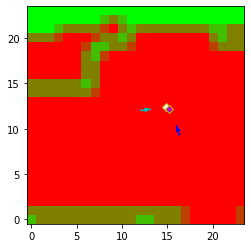

In [8]:
from genff.metrics import ChangeCenterDistMetric
metric = ChangeCenterDistMetric()

dataset = GroupDataset("example_beechwood_data.h5")

for i in range(10): #len(dataset)):
    print("Sample {}".format(i))
    individual, context, mask, env = dataset[i]
    
    m,  avg_proposal1, avg_proposal2, all_proposals = metric.compute_metric(individual, context, mask)
    print("ChangeCenterDistMetric = {}".format(m))
    print("Avg Proposal1 = {}".format(avg_proposal1.flatten()))
    print("Avg Proposal2 = {}".format(avg_proposal2.flatten()))
    plot_sample(individual, context, mask, env_cropped=env, env_res=dataset.resolution)
    
    offset_x = (env.shape[1] * 0.5) * dataset.resolution
    offset_y = (env.shape[0] * 0.5) * dataset.resolution
    
    plt.plot((avg_proposal1[0,0] + offset_x)/dataset.resolution,
             (avg_proposal1[0,1] + offset_y)/dataset.resolution, 
             'wD', mec='y', mew=1)
    plt.plot((avg_proposal2[0,0] + offset_x)/dataset.resolution, 
             (avg_proposal2[0,1] + offset_y)/dataset.resolution, 
             'mD', mec='y', mew=1)
    
    plt.show()

## Cocktail Party Data

Loading ../data/cocktail_party/train_skip3.h5
Set has 468 samples
Sample 0
ChangeCenterDistMetric = -0.06462293118238449
Avg Proposal1 = [-0.5438594   0.47182304]
Avg Proposal2 = [-0.5609336  0.5341495]


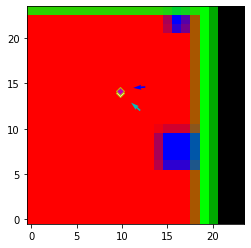

Sample 1
ChangeCenterDistMetric = -0.0646229162812233
Avg Proposal1 = [-0.7180078  -0.05352393]
Avg Proposal2 = [-0.7009336  -0.11585043]


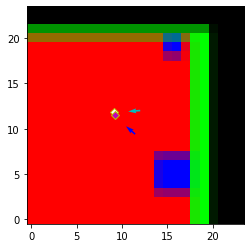

Sample 2
ChangeCenterDistMetric = 0.028854310512542725
Avg Proposal1 = [ 0.24728978 -0.49801204]
Avg Proposal2 = [ 0.31113413 -0.40843353]


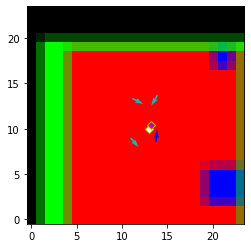

Sample 3
ChangeCenterDistMetric = -0.25330591201782227
Avg Proposal1 = [ 0.11179754 -0.07792548]
Avg Proposal2 = [ 0.07780082 -0.37510023]


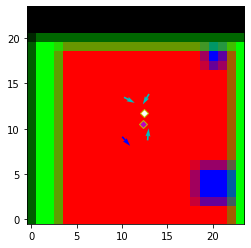

Sample 4
ChangeCenterDistMetric = 0.041790664196014404
Avg Proposal1 = [ 0.39235088 -0.05297397]
Avg Proposal2 = [0.32446748 0.0182331 ]


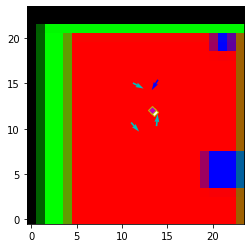

Sample 5
ChangeCenterDistMetric = -0.00736844539642334
Avg Proposal1 = [ 0.05643174 -0.14815606]
Avg Proposal2 = [ 0.09446748 -0.0117669 ]


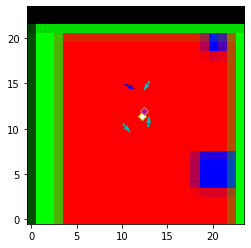

Sample 6
ChangeCenterDistMetric = 0.007802292704582214
Avg Proposal1 = [-0.09467271  0.42696518]
Avg Proposal2 = [-0.11523837  0.48541856]


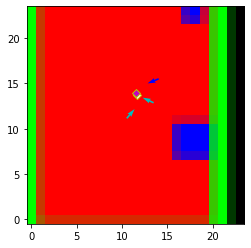

Sample 7
ChangeCenterDistMetric = -0.1031554564833641
Avg Proposal1 = [-0.6597198   0.01523739]
Avg Proposal2 = [-0.55523837 -0.05958144]


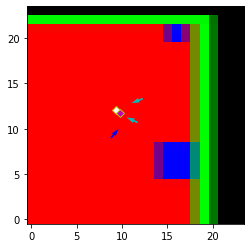

Sample 8
ChangeCenterDistMetric = -0.024579420685768127
Avg Proposal1 = [-0.10132256  0.13905309]
Avg Proposal2 = [-0.18523836  0.15541856]


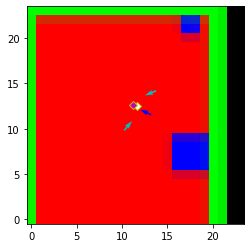

Sample 9
ChangeCenterDistMetric = -0.035237908363342285
Avg Proposal1 = [ 0.08466879 -0.28877807]
Avg Proposal2 = [ 0.21445955 -0.31839195]


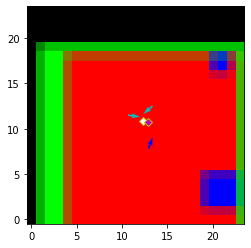

Sample 10
ChangeCenterDistMetric = -0.17933687567710876
Avg Proposal1 = [0.47819048 0.28631666]
Avg Proposal2 = [0.26945958 0.27160802]


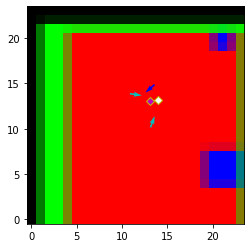

Sample 11
ChangeCenterDistMetric = 0.022417932748794556
Avg Proposal1 = [-0.1494806   0.10228552]
Avg Proposal2 = [-0.07054044  0.14660804]


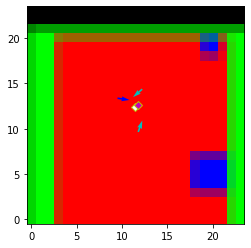

Sample 12
ChangeCenterDistMetric = -0.04768995940685272
Avg Proposal1 = [-0.14998148  0.56560725]
Avg Proposal2 = [-0.1153371  0.4880158]


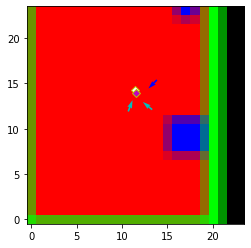

Sample 13
ChangeCenterDistMetric = -0.04361887276172638
Avg Proposal1 = [-0.530766   -0.02704324]
Avg Proposal2 = [-0.5103371   0.05301579]


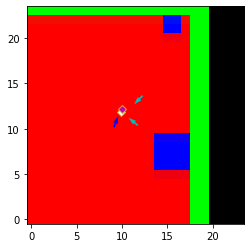

Sample 14
ChangeCenterDistMetric = -0.0023652315139770508
Avg Proposal1 = [-0.12526377  0.08048338]
Avg Proposal2 = [-0.18033712  0.0780158 ]


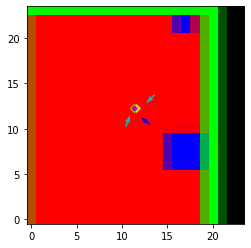

Sample 15
ChangeCenterDistMetric = -0.03068128228187561
Avg Proposal1 = [ 0.20180422 -0.5578432 ]
Avg Proposal2 = [ 0.19728394 -0.50609857]


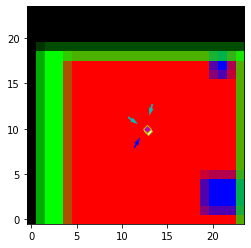

Sample 16
ChangeCenterDistMetric = 0.011636205017566681
Avg Proposal1 = [0.4693699  0.10417561]
Avg Proposal2 = [0.44728398 0.09890146]


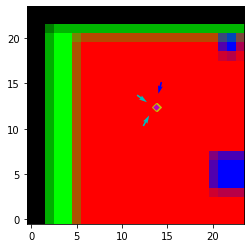

Sample 17
ChangeCenterDistMetric = -0.03366033360362053
Avg Proposal1 = [ 0.08567778 -0.03462806]
Avg Proposal2 = [ 0.11228397 -0.08109855]


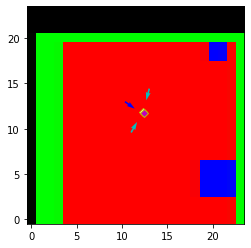

Sample 18
ChangeCenterDistMetric = -0.026711761951446533
Avg Proposal1 = [-0.07429849  0.5523795 ]
Avg Proposal2 = [-0.03625967  0.48735952]


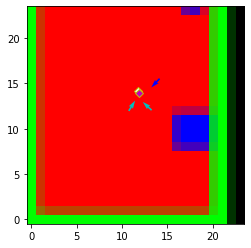

Sample 19
ChangeCenterDistMetric = -0.027837231755256653
Avg Proposal1 = [-0.51060796 -0.01553106]
Avg Proposal2 = [-0.4612597   0.04235952]


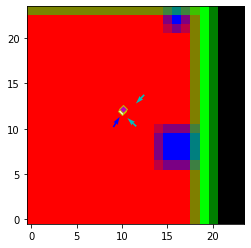

In [9]:
dataset = GroupDataset("../data/cocktail_party/train_skip3.h5")
print("Set has {} samples".format(len(dataset)))

for i in range(20):
    print("Sample {}".format(i))
    individual, context, mask, env = dataset[i]
    
    m,  avg_proposal1, avg_proposal2, all_proposals = metric.compute_metric(individual, context, mask)
    print("ChangeCenterDistMetric = {}".format(m))
    print("Avg Proposal1 = {}".format(avg_proposal1.flatten()))
    print("Avg Proposal2 = {}".format(avg_proposal2.flatten()))
    plot_sample(individual, context, mask, env_cropped=env, env_res=dataset.resolution)
    
    offset_x = (env.shape[1] * 0.5) * dataset.resolution
    offset_y = (env.shape[0] * 0.5) * dataset.resolution
    
    plt.plot((avg_proposal1[0,0] + offset_x)/dataset.resolution,
             (avg_proposal1[0,1] + offset_y)/dataset.resolution, 
             'wD', mec='y', mew=1)
    plt.plot((avg_proposal2[0,0] + offset_x)/dataset.resolution, 
             (avg_proposal2[0,1] + offset_y)/dataset.resolution, 
             'mD', mec='y', mew=1)
    
    plt.show()

# Occlusion (OccludesOther and IsOccluded)
## Simulated data

Loading example_beechwood_data.h5
Sample 0
OccludesOtherMetric = 0.0
IsOccludedMetric = 0.0


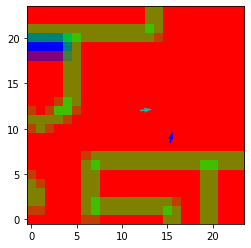

Hacked group1
OccludesOtherMetric = 0.0
IsOccludedMetric = 0.0


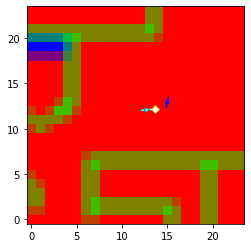

Hacked group2
OccludesOtherMetric = 1.0
IsOccludedMetric = 0.0


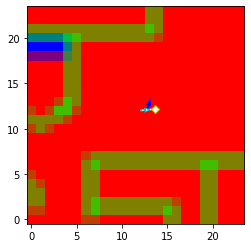

Hacked group3
OccludesOtherMetric = 0.0
IsOccludedMetric = 1.0


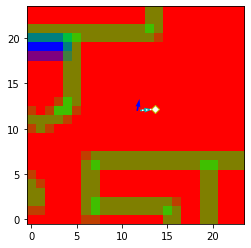

Sample 1
OccludesOtherMetric = 0.0
IsOccludedMetric = 0.0


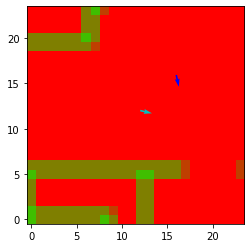

Hacked group1
OccludesOtherMetric = 0.0
IsOccludedMetric = 0.0


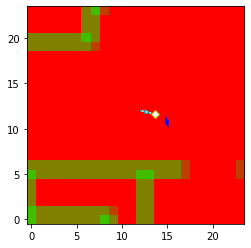

Hacked group2
OccludesOtherMetric = 1.0
IsOccludedMetric = 0.0


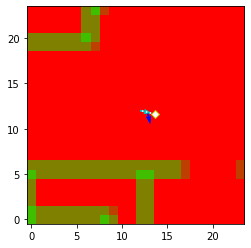

Hacked group3
OccludesOtherMetric = 0.0
IsOccludedMetric = 1.0


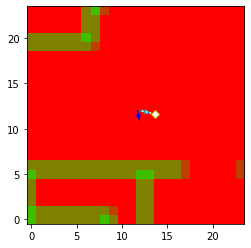

Sample 2
OccludesOtherMetric = 0.0
IsOccludedMetric = 0.0


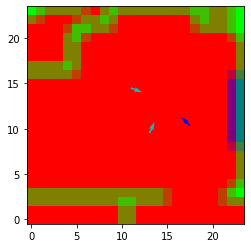

Hacked group1
OccludesOtherMetric = 0.0
IsOccludedMetric = 0.0


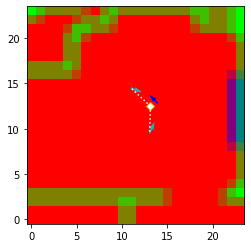

Hacked group2
OccludesOtherMetric = 1.0
IsOccludedMetric = 0.0


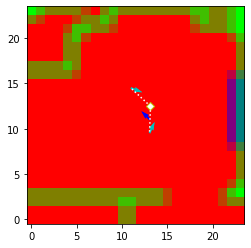

Hacked group3
OccludesOtherMetric = 0.0
IsOccludedMetric = 1.0


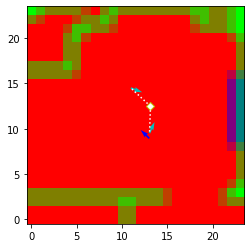

Sample 3
OccludesOtherMetric = 0.0
IsOccludedMetric = 0.0


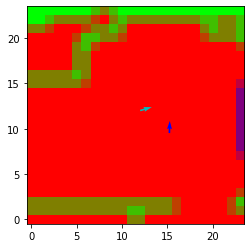

Hacked group1
OccludesOtherMetric = 0.0
IsOccludedMetric = 0.0


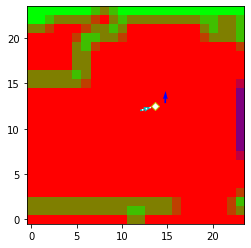

Hacked group2
OccludesOtherMetric = 1.0
IsOccludedMetric = 0.0


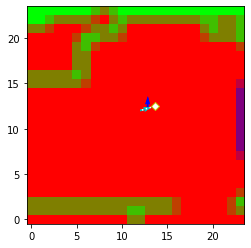

Hacked group3
OccludesOtherMetric = 0.0
IsOccludedMetric = 1.0


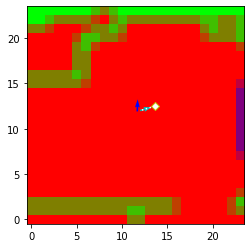

Sample 4
OccludesOtherMetric = 0.0
IsOccludedMetric = 0.0


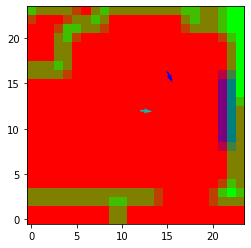

Hacked group1
OccludesOtherMetric = 0.0
IsOccludedMetric = 0.0


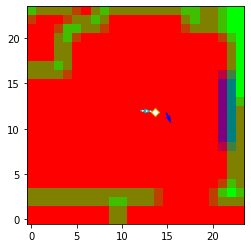

Hacked group2
OccludesOtherMetric = 1.0
IsOccludedMetric = 0.0


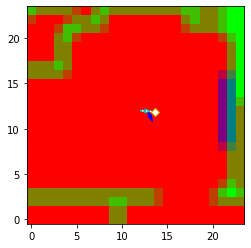

Hacked group3
OccludesOtherMetric = 0.0
IsOccludedMetric = 1.0


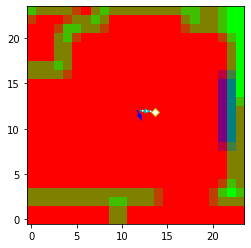

Sample 5
OccludesOtherMetric = 0.0
IsOccludedMetric = 0.0


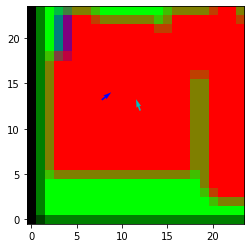

Hacked group1
OccludesOtherMetric = 0.0
IsOccludedMetric = 0.0


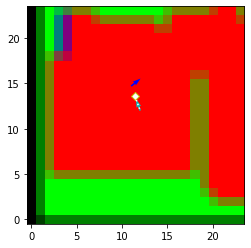

Hacked group2
OccludesOtherMetric = 1.0
IsOccludedMetric = 0.0


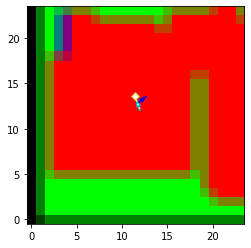

Hacked group3
OccludesOtherMetric = 0.0
IsOccludedMetric = 1.0


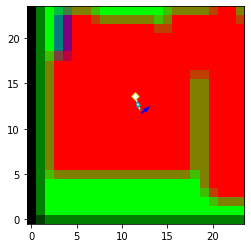

Sample 6
OccludesOtherMetric = 0.0
IsOccludedMetric = 0.0


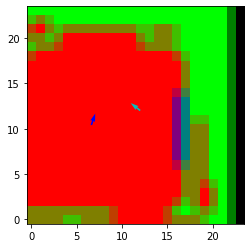

Hacked group1
OccludesOtherMetric = 0.0
IsOccludedMetric = 0.0


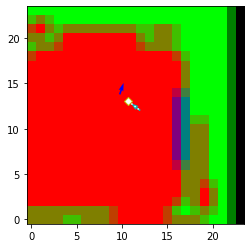

Hacked group2
OccludesOtherMetric = 1.0
IsOccludedMetric = 0.0


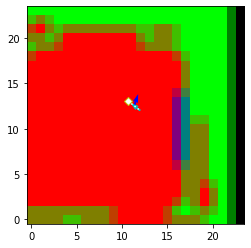

Hacked group3
OccludesOtherMetric = 0.0
IsOccludedMetric = 1.0


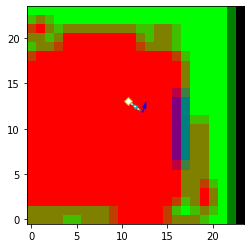

Sample 7
OccludesOtherMetric = 0.0
IsOccludedMetric = 0.0


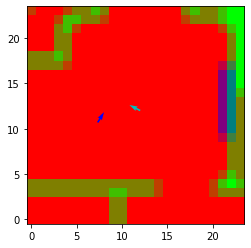

Hacked group1
OccludesOtherMetric = 0.0
IsOccludedMetric = 0.0


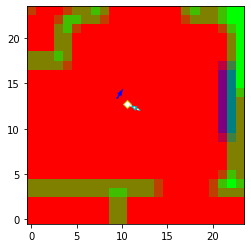

Hacked group2
OccludesOtherMetric = 1.0
IsOccludedMetric = 0.0


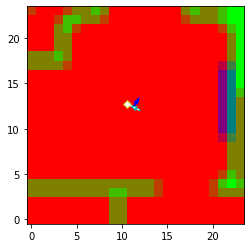

Hacked group3
OccludesOtherMetric = 0.0
IsOccludedMetric = 1.0


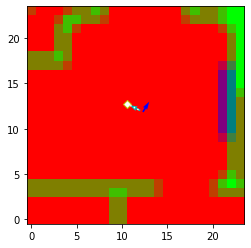

Sample 8
OccludesOtherMetric = 0.0
IsOccludedMetric = 0.0


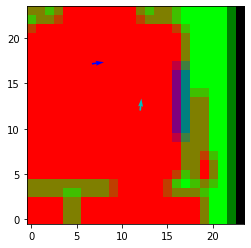

Hacked group1
OccludesOtherMetric = 0.0
IsOccludedMetric = 0.0


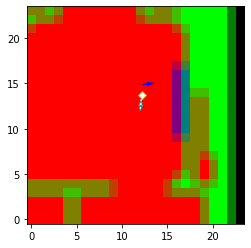

Hacked group2
OccludesOtherMetric = 1.0
IsOccludedMetric = 0.0


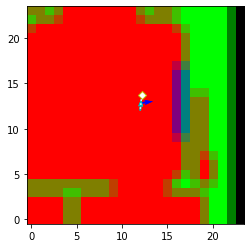

Hacked group3
OccludesOtherMetric = 0.0
IsOccludedMetric = 1.0


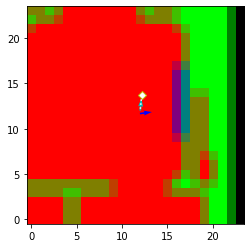

Sample 9
OccludesOtherMetric = 0.0
IsOccludedMetric = 0.0


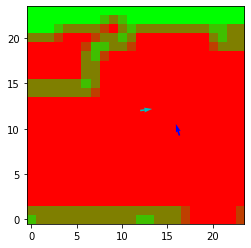

Hacked group1
OccludesOtherMetric = 0.0
IsOccludedMetric = 0.0


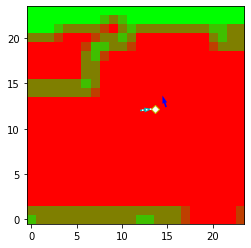

Hacked group2
OccludesOtherMetric = 1.0
IsOccludedMetric = 0.0


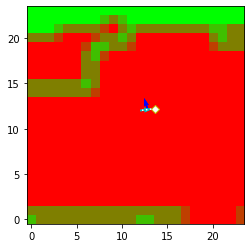

Hacked group3
OccludesOtherMetric = 0.0
IsOccludedMetric = 1.0


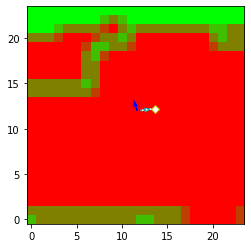

In [10]:
from genff.metrics import OccludesOtherMetric, IsOccludedMetric 
from genff.metrics.quant_metrics import average_ospace_proposal
import torch

metric_occother = OccludesOtherMetric()
metric_isocc = IsOccludedMetric()

dataset = GroupDataset("example_beechwood_data.h5")

for i in range(10): #len(dataset)):
    print("Sample {}".format(i))
    individual, context, mask, env = dataset[i]
    
    
    m1, (avg_proposal, v_ind, v_con) = metric_occother.compute_metric(individual, context, mask)
    print("OccludesOtherMetric = {}".format(m1))
    
    m2, _ = metric_isocc.compute_metric(individual, context, mask)
    print("IsOccludedMetric = {}".format(m2))
    
    plot_sample(individual, context, mask, env_cropped=env, env_res=dataset.resolution)
    plt.show()
    
    
    # what if we move the individual to the center of the group?
    print("Hacked group1")
    
    avg_proposal, _ = average_ospace_proposal(None, context[mask.bool(),:].numpy(), 0, 1, 2)
    new_ind = torch.from_numpy(np.array([[avg_proposal[0,0], avg_proposal[0,1], individual[0,2]]]))
    
    m1, (avg_proposal, v_ind, v_con) = metric_occother.compute_metric(new_ind, context, mask)
    print("OccludesOtherMetric = {}".format(m1))
    
    m2, _ = metric_isocc.compute_metric(new_ind, context, mask)
    print("IsOccludedMetric = {}".format(m2))
    
    plot_sample(new_ind, context, mask, 
                env_cropped=env, env_res=dataset.resolution)
    
    offset_x = (env.shape[1] * 0.5) * dataset.resolution
    offset_y = (env.shape[0] * 0.5) * dataset.resolution
    
    plt.plot((avg_proposal[0,0] + offset_x)/dataset.resolution, 
             (avg_proposal[0,1] + offset_y)/dataset.resolution, 
             'wD', mec='y', mew=1)
    for v in v_con:
        plt.plot([(avg_proposal[0,0] + offset_x)/dataset.resolution, 
                  (v[0] + avg_proposal[0,0] + offset_x)/dataset.resolution],
                 [(avg_proposal[0,1] + offset_y)/dataset.resolution, 
                  (v[1] + avg_proposal[0,1] + offset_x)/dataset.resolution],
                 'w:', mec='y', mew=1)
    
    plt.show()
    
    # what if we move the individual to one of the vectors v connecting the center with another member?
    print("Hacked group2")
    
    new_ind = torch.from_numpy(np.array([[v_con[0,0]*0.5 + avg_proposal[0,0], 
                                         v_con[0,1]*0.5 + avg_proposal[0,1], 
                                         individual[0,2]]]))
    
    plot_sample(new_ind, context, mask, 
                env_cropped=env, env_res=dataset.resolution)
    
    m1, (avg_proposal, v_ind, v_con) = metric_occother.compute_metric(new_ind, context, mask)
    print("OccludesOtherMetric = {}".format(m1))
    
    m2, _ = metric_isocc.compute_metric(new_ind, context, mask)
    print("IsOccludedMetric = {}".format(m2))
    
    plot_sample(new_ind, context, mask, 
                env_cropped=env, env_res=dataset.resolution)
    
    offset_x = (env.shape[1] * 0.5) * dataset.resolution
    offset_y = (env.shape[0] * 0.5) * dataset.resolution
    
    plt.plot((avg_proposal[0,0] + offset_x)/dataset.resolution, 
             (avg_proposal[0,1] + offset_y)/dataset.resolution, 
             'wD', mec='y', mew=1)
    for v in v_con:
        plt.plot([(avg_proposal[0,0] + offset_x)/dataset.resolution, 
                  (v[0] + avg_proposal[0,0] + offset_x)/dataset.resolution],
                 [(avg_proposal[0,1] + offset_y)/dataset.resolution, 
                  (v[1] + avg_proposal[0,1] + offset_x)/dataset.resolution],
                 'w:', mec='y', mew=1)
    
    plt.show()
    
    # what if we move the individual behind another member?
    print("Hacked group3")
    
    new_ind = torch.from_numpy(np.array([[v_con[0,0]*1.2 + avg_proposal[0,0], 
                             v_con[0,1]*1.2 + avg_proposal[0,1], 
                             individual[0,2]]]))
    
    plot_sample(new_ind, context, mask, 
                env_cropped=env, env_res=dataset.resolution)
    
    m1, (avg_proposal, v_ind, v_con) = metric_occother.compute_metric(new_ind, context, mask)
    print("OccludesOtherMetric = {}".format(m1))
    
    m2, _ = metric_isocc.compute_metric(new_ind, context, mask)
    print("IsOccludedMetric = {}".format(m2))
    
    
    offset_x = (env.shape[1] * 0.5) * dataset.resolution
    offset_y = (env.shape[0] * 0.5) * dataset.resolution
    
    plt.plot((avg_proposal[0,0] + offset_x)/dataset.resolution, 
             (avg_proposal[0,1] + offset_y)/dataset.resolution, 
             'wD', mec='y', mew=1)
    for v in v_con:
        plt.plot([(avg_proposal[0,0] + offset_x)/dataset.resolution, 
                  (v[0] + avg_proposal[0,0] + offset_x)/dataset.resolution],
                 [(avg_proposal[0,1] + offset_y)/dataset.resolution, 
                  (v[1] + avg_proposal[0,1] + offset_x)/dataset.resolution],
                 'w:', mec='y', mew=1)
    
    plt.show()
    

# Individual orientation (Orient Metric)

## Simulated data
The metric should always be close to zero since the data is generated from a circle...

Loading example_beechwood_data.h5
Example 0


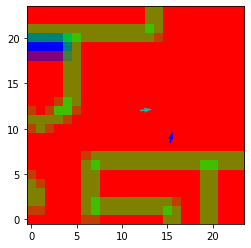

0) Fit Circ | OrientMetric = 53.38727206243423
0) Proposal | OrientMetric = 9.965717282101334
0) No Ind | Fit Circ | OrientMetric = 17.26727677518005
0) No Ind | Proposal | OrientMetric = 17.267271467115005
Example 1


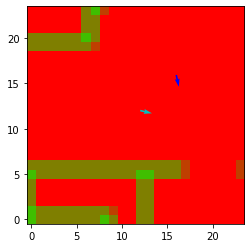

1) Fit Circ | OrientMetric = 57.80293107686844
1) Proposal | OrientMetric = 16.71372880374399
1) No Ind | Fit Circ | OrientMetric = 26.79645407136162
1) No Ind | Proposal | OrientMetric = 26.796454056516815
Example 2


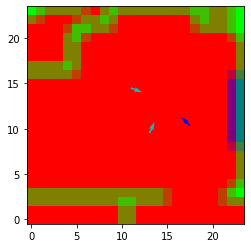

2) Fit Circ | OrientMetric = 5.052509781672419e-06
2) Proposal | OrientMetric = 7.189580063760482
2) No Ind | Fit Circ | OrientMetric = 27.617364474947976
2) No Ind | Proposal | OrientMetric = 9.584531254712093
Example 3


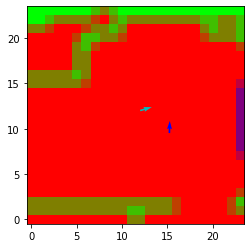

3) Fit Circ | OrientMetric = 54.16844762799776
3) Proposal | OrientMetric = 5.2185855447807326
3) No Ind | Fit Circ | OrientMetric = 9.724144346275313
3) No Ind | Proposal | OrientMetric = 9.724147151536323
Example 4


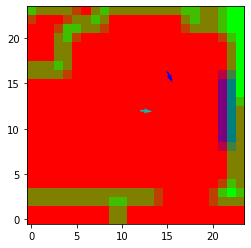

4) Fit Circ | OrientMetric = 59.56977807174568
4) Proposal | OrientMetric = 16.098820533146082
4) No Ind | Fit Circ | OrientMetric = 26.26875114490885
4) No Ind | Proposal | OrientMetric = 26.26874681105246
Example 5


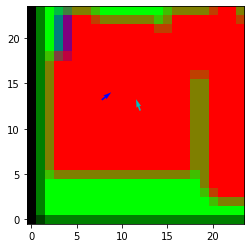

5) Fit Circ | OrientMetric = 54.25717178531622
5) Proposal | OrientMetric = 7.525341918074553
5) No Ind | Fit Circ | OrientMetric = 13.564323266632194
5) No Ind | Proposal | OrientMetric = 13.564321974633028
Example 6


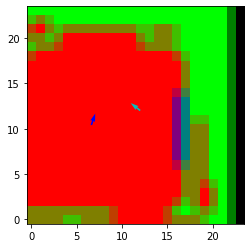

6) Fit Circ | OrientMetric = 54.74196495222539
6) Proposal | OrientMetric = 14.819591215770895
6) No Ind | Fit Circ | OrientMetric = 24.026178386576134
6) No Ind | Proposal | OrientMetric = 24.026177367854917
Example 7


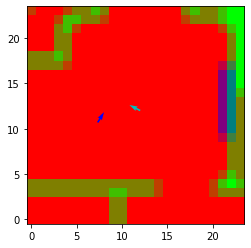

7) Fit Circ | OrientMetric = 42.7293151079521
7) Proposal | OrientMetric = 3.994451720974367
7) No Ind | Fit Circ | OrientMetric = 7.398082425703253
7) No Ind | Proposal | OrientMetric = 7.398078418364292
Example 8


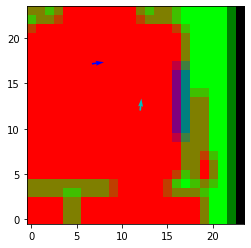

8) Fit Circ | OrientMetric = 51.49851643615602
8) Proposal | OrientMetric = 20.20840215014127
8) No Ind | Fit Circ | OrientMetric = 29.65929017732885
8) No Ind | Proposal | OrientMetric = 29.659287093363723
Example 9


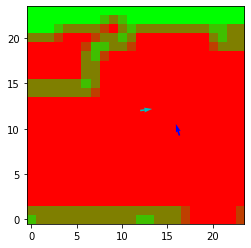

9) Fit Circ | OrientMetric = 40.076524275832504
9) Proposal | OrientMetric = 4.265903929158184
9) No Ind | Fit Circ | OrientMetric = 7.802933066180822
9) No Ind | Proposal | OrientMetric = 7.802924221038457


In [11]:
from genff.metrics import OrientMetric

dataset = GroupDataset("example_beechwood_data.h5")


for i in range(10): #len(dataset)):
    individual, context, mask, env = dataset[i]

    print("Example {}".format(i))
    plot_sample(individual, context, mask, env_cropped=env, env_res=dataset.resolution)
    plt.show()
    
    metric = OrientMetric(use_individual=True, fit_circ=True)
    m, ideal_angle, center = metric.compute_metric(individual, context, mask, env)
    print("{}) Fit Circ | OrientMetric = {}".format(i,m))

    metric = OrientMetric(use_individual=True, fit_circ=False)
    m, ideal_angle, center = metric.compute_metric(individual, context, mask, env)
    print("{}) Proposal | OrientMetric = {}".format(i,m))
    
    # for the most part, results should be the same as above since the data is originally coming from a circle
    metric = OrientMetric(use_individual=False, fit_circ=True)
    m, ideal_angle, center = metric.compute_metric(individual, context, mask, env)
    print("{}) No Ind | Fit Circ | OrientMetric = {}".format(i,m))

    metric = OrientMetric(use_individual=False, fit_circ=False)
    m, ideal_angle, center = metric.compute_metric(individual, context, mask, env)
    print("{}) No Ind | Proposal | OrientMetric = {}".format(i,m))